In [14]:
library(Hmisc)
library(car)
library(ggplot2)
library(lattice)
library(survival)
library(ggvis)
library(MASS)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units


Attaching package: ‘ggvis’

The following object is masked from ‘package:ggplot2’:

    resolution



In [1]:
df = data.frame(read.csv("boston-data-clean.csv"))
df3 = data.frame(read.csv("boston-top-5.csv"))

In [2]:
d <- transform(df2, PTRATIO = as.factor(PTRATIO), TAX = as.factor(TAX),NOX = as.factor(NOX), CHAS = as.factor(CHAS),INDUS = as.factor(INDUS) , ZN = as.factor(ZN))

ERROR: Error in is.factor(x): object 'PTRATIO' not found


In [3]:
summary(df2)

  MS.SubClass      MS.Zoning     Lot.Frontage       Lot.Area       Street    
 Min.   : 20.0   A (agr):   2   Min.   : 21.00   Min.   :  1300   Grvl:  12  
 1st Qu.: 20.0   C (all):  25   1st Qu.: 58.00   1st Qu.:  7441   Pave:2916  
 Median : 50.0   FV     : 139   Median : 68.00   Median :  9444              
 Mean   : 57.4   I (all):   2   Mean   : 69.22   Mean   : 10150              
 3rd Qu.: 70.0   RH     :  27   3rd Qu.: 80.00   3rd Qu.: 11556              
 Max.   :190.0   RL     :2273   Max.   :313.00   Max.   :215245              
                 RM     : 460   NA's   :490                                  
  Alley      Lot.Shape  Land.Contour   Lot.Config   Land.Slope  Neighborhood 
 Grvl: 120   IR1: 978   Bnk: 117     Corner : 511   Gtl:2787   NAmes  : 443  
 Pave:  78   IR2:  76   HLS: 120     CulDSac: 180   Mod: 125   CollgCr: 267  
 NA's:2730   IR3:  16   Low:  60     FR2    :  85   Sev:  16   OldTown: 239  
             Reg:1858   Lvl:2631     FR3    :  13              E

In [40]:
fit <- lm.ridge(MEDV~ ., data=df2)
fit2 <- lm(sqrt(MEDV)~ PTRATIO + AGE + DIS + TAX + RM + NOX + CHAS + INDUS + ZN+ CRIM + (LSTAT)^2, data=d)
qqPlot(fit, main="QQ Plot")

ERROR: Error in order(x[good]): unimplemented type 'list' in 'orderVector1'



In [16]:
fit3 <- lm(SalePrice ~ as.factor(Yr.Sold) + Sale.Type + Garage.Finish,data=df2)
summary(fit3)


Call:
lm(formula = SalePrice ~ as.factor(Yr.Sold) + Sale.Type + Garage.Finish, 
    data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-152387  -39634   -9277   25108  528483 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            126182.6    65765.2   1.919  0.05513 .  
as.factor(Yr.Sold)2007   1229.0     3711.2   0.331  0.74055    
as.factor(Yr.Sold)2008   4318.5     3849.5   1.122  0.26203    
as.factor(Yr.Sold)2009   4699.3     3788.2   1.241  0.21489    
as.factor(Yr.Sold)2010    815.3     4570.8   0.178  0.85844    
Sale.TypeCon            83804.9    30052.6   2.789  0.00533 ** 
Sale.TypeConLD          -8631.6    15928.8  -0.542  0.58794    
Sale.TypeConLI          54579.7    24177.6   2.257  0.02406 *  
Sale.TypeConLw           2450.9    25657.1   0.096  0.92391    
Sale.TypeCWD            33670.2    20254.9   1.662  0.09656 .  
Sale.TypeNew            96597.2     8513.3  11.347  < 2e-16 ***
Sale.TypeOth             5

,Test stat,Pr(>|t|)
as.factor(Yr.Sold),NA,NA
Sale.Type,NA,NA
Garage.Finish,NA,NA
Tukey test,1.378,0.168


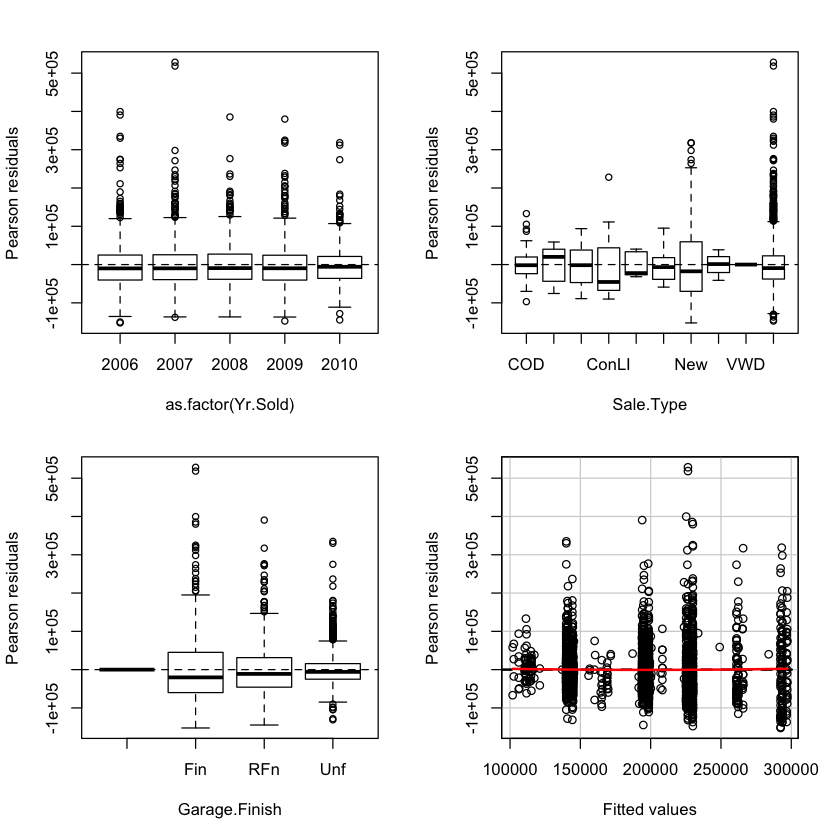

In [17]:
residualPlots(fit3)

In [12]:
alias(fit)

Model :
MEDV ~ PTRATIO + AGE + DIS + TAX + RM + NOX + CHAS + INDUS + 
    ZN + CRIM + LSTAT

Complete :
           (Intercept) PTRATIO14.7 PTRATIO17.4 PTRATIO18.4 PTRATIO20.2
TAX304      0           0           0           1           0         
TAX307      0           0           1           0           0         
TAX403      0           1           0           0           0         
TAX437      0           0           0           0           0         
TAX666      0           0           0           0           1         
INDUS6.2    0           0           1           0           0         
INDUS8.14   0           0           0           0           0         
INDUS9.9    0           0           0           1           0         
INDUS18.1   0           0           0           0           1         
INDUS19.58  0           1           0           0           0         
INDUS21.89  0           0           0           0           0         
ZN20        1          -1          -1       

In [13]:
coefficients(fit)

(Intercept)  PTRATIO14.7  PTRATIO17.4  PTRATIO18.4  PTRATIO20.2    PTRATIO21 
 63.56945391  -5.70818358  -3.82903993 -10.59302230  -8.76034623  -6.99340040 
 PTRATIO21.2          AGE          DIS       TAX304       TAX307       TAX403 
-12.45635174  -0.01367751  -4.65087236           NA           NA           NA 
      TAX437       TAX666           RM          NOX        CHAS1     INDUS6.2 
          NA           NA   1.64503001 -32.14574602   2.48527314           NA 
   INDUS8.14     INDUS9.9    INDUS18.1   INDUS19.58   INDUS21.89         ZN20 
          NA           NA           NA           NA           NA           NA 
        CRIM        LSTAT 
 -0.16093140  -0.75153011

In [31]:
(d$LSTAT)^2

[1]   68.2276  105.2676   71.7409   43.2964  215.2089  136.6561  127.2384
  [8]  441.8404  191.2689  350.4384  395.2144  265.6900  272.5801  219.3361
 [15]  298.5984  163.8400  143.5204  510.7600  170.0416  767.8441  336.7225
 [22]  413.7156  295.4961  236.8521  336.3556  158.7600  150.3076  123.6544
 [29]  225.9009  299.6361  287.6416  285.6100  212.8681  454.5424  340.7716
 [36]  583.7056 1184.0481  719.3124  698.0164  857.9041  772.8400  277.2225
 [43]  872.0209  802.0224  460.1025  198.8100  176.3584  146.8944  249.3241
 [50]  228.6144  225.6004  260.4996   21.0681   41.3449   54.6121   30.2500
 [57]    2.9929    3.6864   11.0224  135.4896   96.2361   13.6900  147.3796
 [64]  123.2100  128.1424  208.2249  144.7209   94.2841  460.5316   98.6049
 [71]   57.7600   17.1396   21.4369    9.7969   40.4496   15.3664   14.1376
 [78]  135.7225   27.5625    6.1009   15.6025   64.8025  118.3744   91.0116
 [85]   22.3729   26.2144   60.6841   47.6100   91.9681   52.7076   34.9281
 [92]  126.5625   65.6100  109.2025  218.7441   55.3536    9.9856   20.6116
 [99]   99.4009  159.7696   35.7604  137.3584   62.4100   86.1184  132.2500
[106]  335.9889  254.0836  107.3296  162.0529

In [8]:
nrow(df2)
ncol(df2)

[1] 2928

[1] 71